In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
import numpy as np

from selection_methods import SelectionMethod

In [3]:
vapeplot.set_palette('avanti')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [4]:
path_data = "../../results/results_training/binary_case_data/"
list_documents = os.listdir(path_data)
len(list_documents)

960

In [5]:
list_df = []
for element in list_documents:
    df_data = pd.read_csv(f"{path_data}{element}")
    name_values = element.split("_exploring")[0]
    df_data['encoder'] = name_values
    list_df.append(df_data)
df_results = pd.concat(list_df, axis=0)
df_results

,description,test_accuracy,test_f1_score,test_precision,test_recall,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder
0,KNeighbors,0.969333,0.969280,0.970616,0.969333,0.010099,0.084649,0.971141,0.971143,0.971943,0.971143,22,word2vec
1,DecisionTree,0.960000,0.960002,0.960007,0.960000,1.543701,0.007609,0.955713,0.955714,0.955761,0.955714,22,word2vec
2,Bagging,0.966000,0.966007,0.966083,0.966000,8.619794,0.011338,0.965994,0.966000,0.966111,0.966000,22,word2vec
3,RandomForest,0.980000,0.979999,0.980001,0.980000,3.723089,0.018256,0.976857,0.976857,0.976858,0.976857,22,word2vec
4,ExtraTrees,0.980667,0.980668,0.980677,0.980667,0.416640,0.019837,0.979428,0.979429,0.979456,0.979429,22,word2vec
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.912667,0.912643,0.912718,0.912667,9.563584,0.012136,0.911137,0.911143,0.911372,0.911143,29,Group_7
7,XGBoost,0.926667,0.926635,0.926815,0.926667,9.261467,0.021789,0.920851,0.920857,0.921328,0.920857,29,Group_7
8,Gaussian Process,0.485333,0.317166,0.235548,0.485333,18.914210,1.482187,0.344144,0.508000,0.750480,0.508000,29,Group_7
9,Hist Gradient Boosting,0.929333,0.929298,0.929531,0.929333,8.473537,0.018871,0.915987,0.916000,0.916528,0.916000,29,Group_7


In [6]:
df_results_train = df_results[['description', 'train_f1_weighted',
            'train_recall_weighted', 'train_precision_weighted', 'train_accuracy',
            'iteration', 'encoder']]

df_results_train.columns = ["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]
df_results_train['Stage'] = "Training"

df_results_test = df_results[['description', 'test_accuracy', 'test_f1_score', 'test_precision',
    'test_recall', 'iteration', 'encoder']]

df_results_test.columns = ["Algorithm", "Accuracy", "F1", "Precision", "Recall", "Iteration", "Encoder"]
df_results_test['Stage'] = "Validating"

df_concat = pd.concat([df_results_train, df_results_test], axis=0)
df_concat

,Algorithm,F1,Recall,Precision,Accuracy,Iteration,Encoder,Stage
0,KNeighbors,0.971141,0.971143,0.971943,0.971143,22,word2vec,Training
1,DecisionTree,0.955713,0.955714,0.955761,0.955714,22,word2vec,Training
2,Bagging,0.965994,0.966000,0.966111,0.966000,22,word2vec,Training
3,RandomForest,0.976857,0.976857,0.976858,0.976857,22,word2vec,Training
4,ExtraTrees,0.979428,0.979429,0.979456,0.979429,22,word2vec,Training
...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.912643,0.912667,0.912718,0.912667,29,Group_7,Validating
7,XGBoost,0.926635,0.926667,0.926815,0.926667,29,Group_7,Validating
8,Gaussian Process,0.317166,0.485333,0.235548,0.485333,29,Group_7,Validating
9,Hist Gradient Boosting,0.929298,0.929333,0.929531,0.929333,29,Group_7,Validating


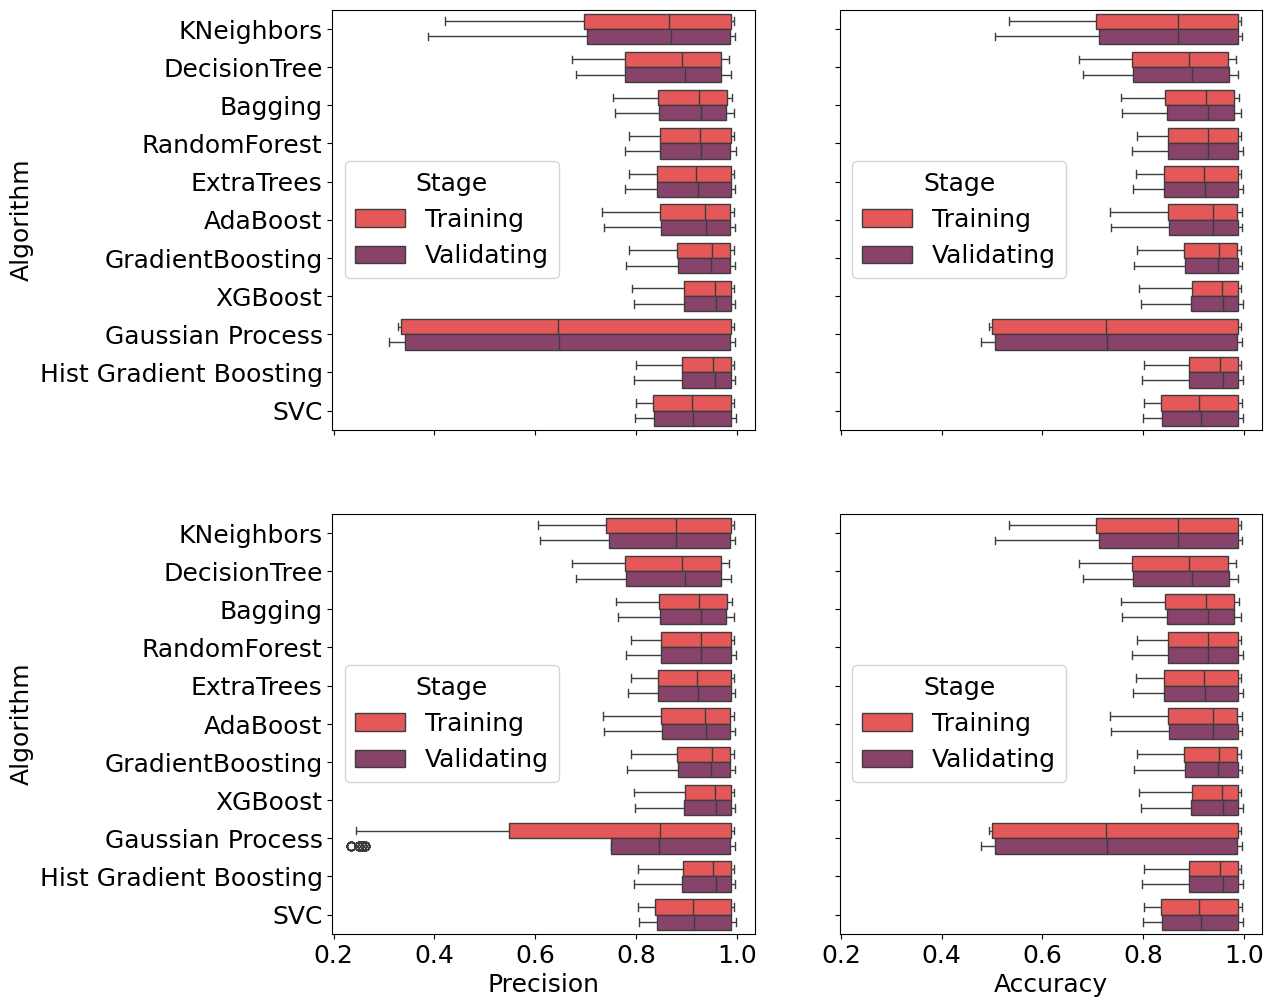

In [7]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Algorithm")
ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Algorithm")
ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Algorithm")
ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Algorithm")

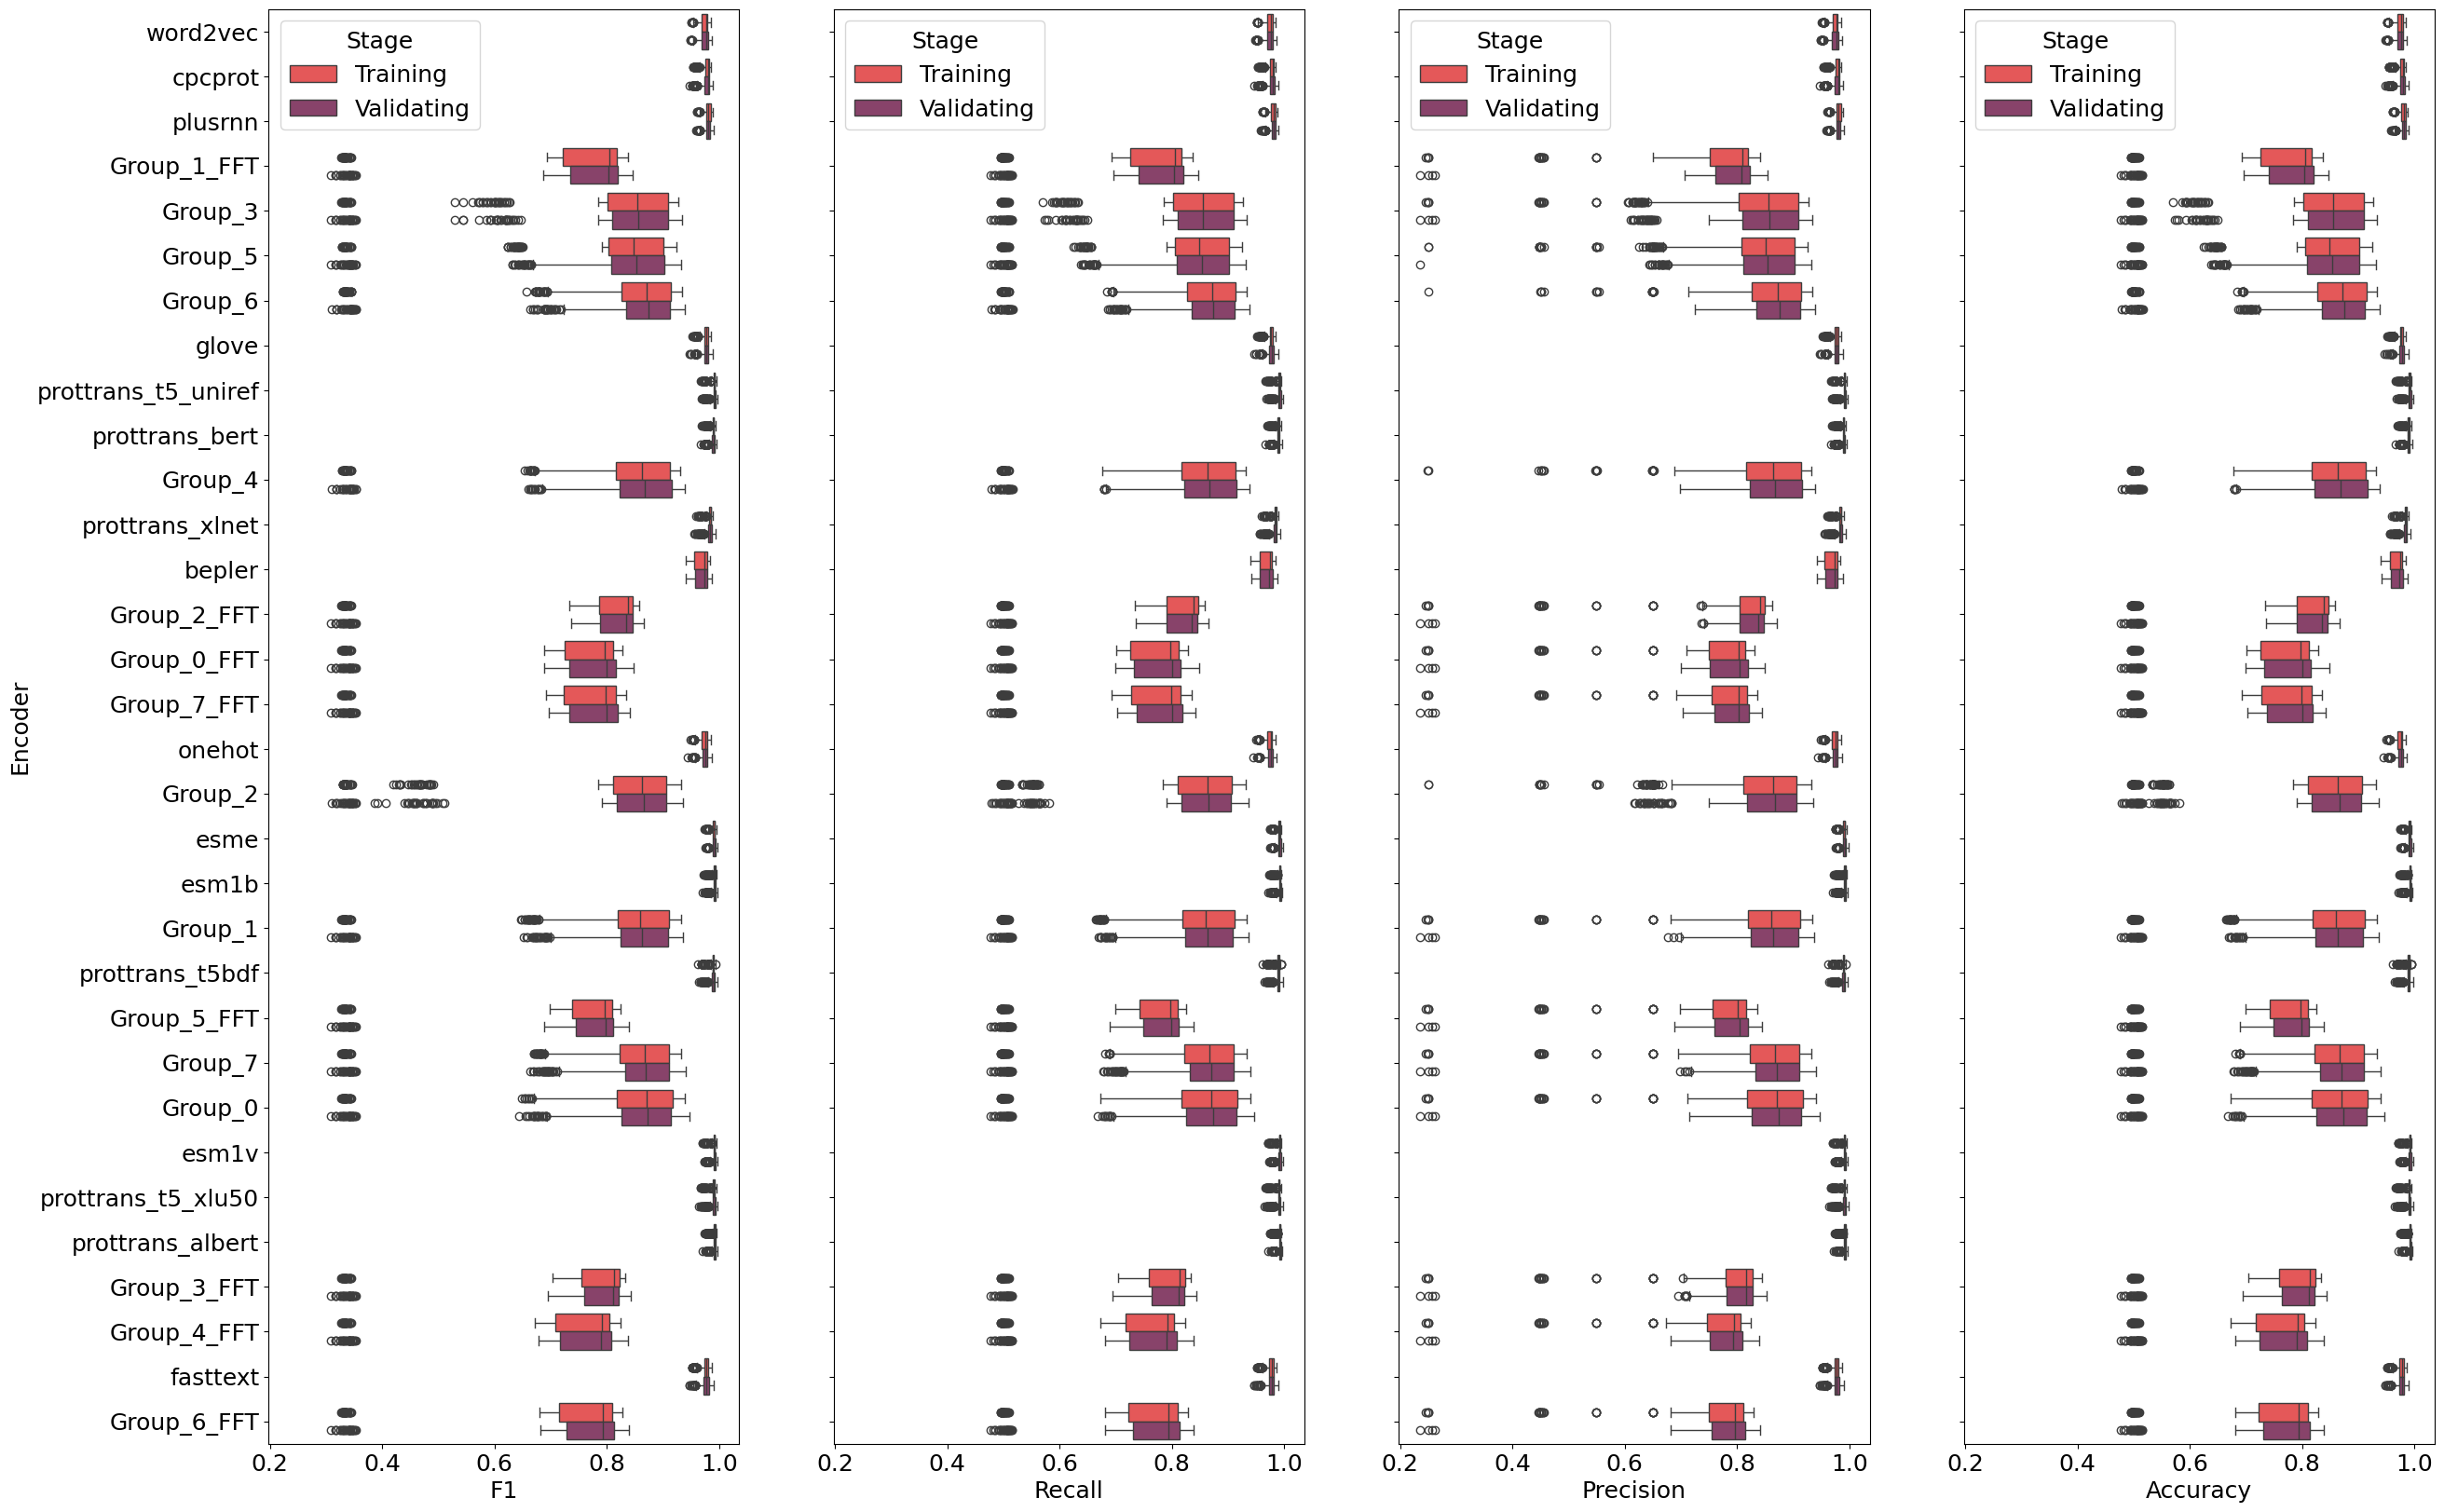

In [8]:
fig, axes = plt.subplots(1,4, figsize=(30,20), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0], data=df_concat, x="F1", hue="Stage", y="Encoder")
ax2 = sns.boxplot(ax=axes[1], data=df_concat, x="Recall", hue="Stage", y="Encoder")
ax3 = sns.boxplot(ax=axes[2], data=df_concat, x="Precision", hue="Stage", y="Encoder")
ax4 = sns.boxplot(ax=axes[3], data=df_concat, x="Accuracy", hue="Stage", y="Encoder")

In [9]:
selection_instance = SelectionMethod()
selection_instance.select(15, df_results_train, df_results_test)

,Algorithm,Encoder,mean_accuracy_training_x,mean_f_score_training_x,mean_precision_training_x,mean_recall_training_x,mean_accuracy_testing_x,mean_f_score_testing_x,mean_precision_testing_x,mean_recall_testing_x,mean_accuracy_testing_y,mean_f_score_testing_y,mean_precision_testing_y,mean_recall_testing_y,mean_accuracy_training_y,mean_f_score_training_y,mean_precision_training_y,mean_recall_training_y,Voting
114,ExtraTrees,esm1b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
115,ExtraTrees,esm1v,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
121,ExtraTrees,prottrans_albert,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
185,GradientBoosting,prottrans_albert,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
217,Hist Gradient Boosting,prottrans_albert,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
274,RandomForest,esm1b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
276,RandomForest,esme,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
306,SVC,esm1b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
308,SVC,esme,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
313,SVC,prottrans_albert,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
